IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASIC OPERATIONS

In [6]:
df=pd.read_csv("C:/Users/SURENDHAN/Downloads/titanic.csv")
i={'C':'CHERBOURG,FRANCE','Q':'QUEENSTOWN,IRELAND','S':'SOUTHAMPTON,ENGLAND'}
o={0:'not survived',1:'survived'}
df['Survived']=df['Survived'].map(o)
df['Embarked']=df['Embarked'].map(i)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,not survived,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,"QUEENSTOWN,IRELAND"
1,893,survived,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,"SOUTHAMPTON,ENGLAND"
2,894,not survived,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,"QUEENSTOWN,IRELAND"
3,895,not survived,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,"SOUTHAMPTON,ENGLAND"
4,896,survived,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,"SOUTHAMPTON,ENGLAND"


In [7]:
df['PassengerId'].duplicated().sum()

0

In [23]:
for i in df.columns:
    print(i,df[i].isnull().sum())


PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 1
Embarked 0


In [24]:
df.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

df.dtypes

Survived
not survived    266
survived        152
Name: count, dtype: int64


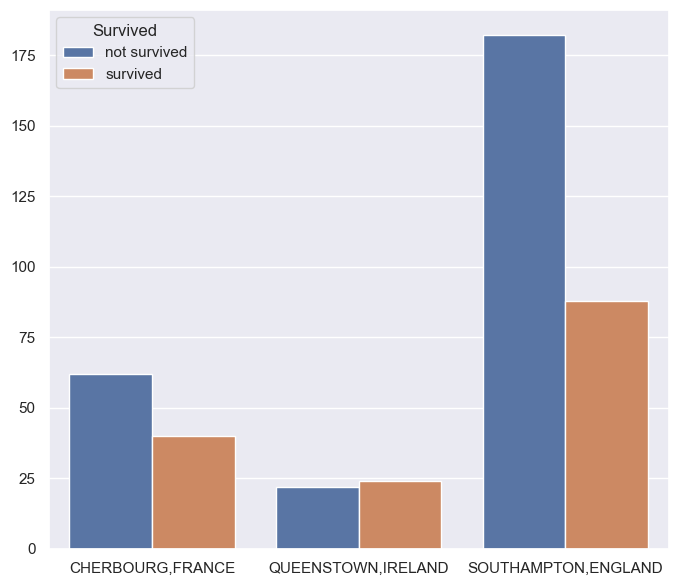

In [9]:
print(df['Survived'].value_counts())
po=df.groupby('Embarked')['Survived'].value_counts() 
pl=po.reset_index(name='count')
sns.set(rc={'figure.figsize':(8,7)})
sns.barplot(data=pl,x='Embarked',y='count',hue='Survived')
plt.xlabel('')
plt.ylabel('')
plt.show()


SURVIVED BASED ON GENDER

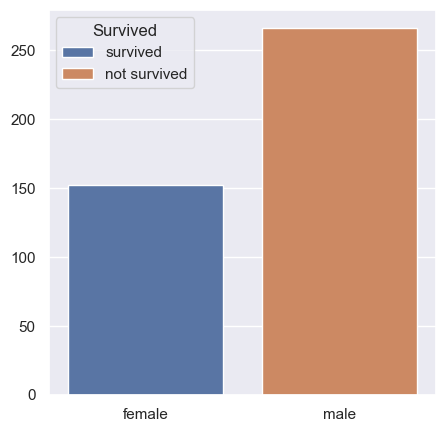

In [10]:
se=df.groupby('Sex')['Survived'].value_counts()
t=se.apply(lambda x:x)
ii=t.reset_index(name='count')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=ii,x='Sex',y='count',hue='Survived')
plt.xlabel('')
plt.ylabel('')
plt.show()

AVERAGE PRICE OF TICKET ON PLACE

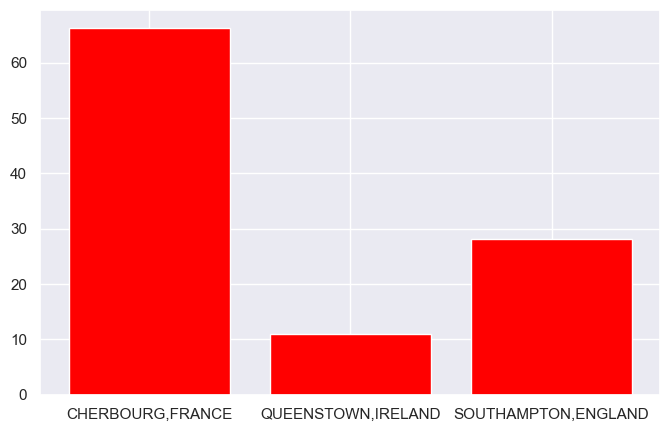

In [11]:
k=df.groupby('Embarked')['Fare'].mean()
k=k.reset_index(name='ans')
plt.figure(figsize=(8,5))
plt.bar(k['Embarked'],k['ans'],color='red')
plt.show()

SURVIVED BASED ON CLASS WISE

In [12]:
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,not survived,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,"QUEENSTOWN,IRELAND"
1,893,survived,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,"SOUTHAMPTON,ENGLAND"
2,894,not survived,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,"QUEENSTOWN,IRELAND"
3,895,not survived,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,"SOUTHAMPTON,ENGLAND"
4,896,survived,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,"SOUTHAMPTON,ENGLAND"


In [14]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

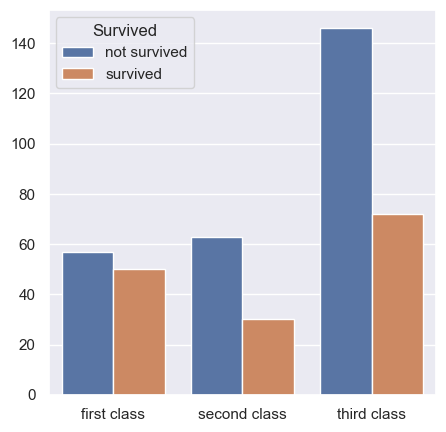

In [15]:
ij={1:'first class',2:'second class',3:'third class'}
df['Pclass']=df['Pclass'].map(ij)
j=df.groupby('Pclass')['Survived'].value_counts()
uu=j.reset_index(name='anss')
sns.barplot(data=uu,x='Pclass',y='anss',hue='Survived')
plt.xlabel('')
plt.ylabel('')
plt.show()

SURVIVAL OF SIBLING

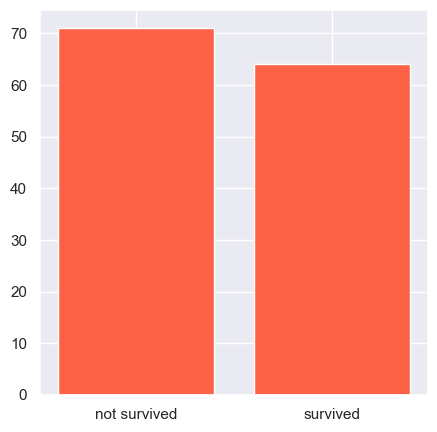

In [16]:
k=df[df['SibSp']>=1]
uii=k.groupby('Survived')['SibSp'].value_counts()
uii=uii.reset_index(name='lon')
opo=pd.DataFrame(uii)
ioi=opo.groupby('Survived')['lon'].sum()
ioi=ioi.reset_index(name='tot')
dd=pd.DataFrame(ioi)
plt.bar(dd['Survived'],dd['tot'],color='tomato')
plt.show()

WHICH AGE IS MOST AS IN GIVEN DATA (EXCEPT NULL)

In [17]:
df=df.dropna(subset=['Age'])
df['Age'].isnull().sum()

0

In [18]:
df['Age']=df['Age'].astype('int64')
df['Age'].dtype

dtype('int64')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,not survived,third class,"Kelly, Mr. James",male,34,0,0,330911,7.8292,"QUEENSTOWN,IRELAND"
1,893,survived,third class,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,"SOUTHAMPTON,ENGLAND"
2,894,not survived,second class,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,"QUEENSTOWN,IRELAND"
3,895,not survived,third class,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,"SOUTHAMPTON,ENGLAND"
4,896,survived,third class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,"SOUTHAMPTON,ENGLAND"


In [20]:
u=df[df['Age']>=1.1]
u['bin']=pd.cut(u['Age'],bins=4)
u['bin'] = u['bin'].astype(str).str.strip()
print(u['bin'].unique())
range_mapping = {
    '(1.926, 20.5]': '1-20',
    '(20.5, 39.0]': '20-39',
    '(39.0, 57.5]': '39-57',
    '(57.5, 76.0]': '57-76'
}
u['bin'] = u['bin'].replace(range_mapping)


['(20.5, 39.0]' '(39.0, 57.5]' '(57.5, 76.0]' '(1.926, 20.5]']


C:\Users\SURENDHAN\AppData\Local\Temp\ipykernel_17036\1541489077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u['bin']=pd.cut(u['Age'],bins=4)
C:\Users\SURENDHAN\AppData\Local\Temp\ipykernel_17036\1541489077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u['bin'] = u['bin'].astype(str).str.strip()
C:\Users\SURENDHAN\AppData\Local\Temp\ipykernel_17036\1541489077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

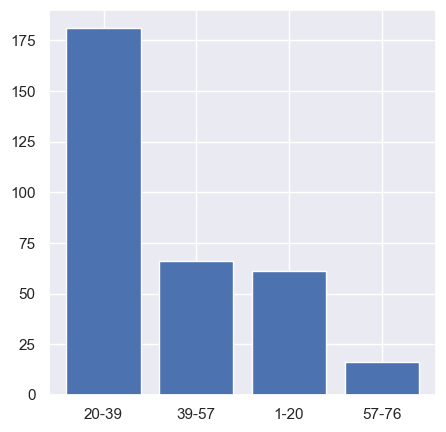

In [21]:
uo=u['bin'].value_counts()
plt.bar(uo.index,uo.values)
plt.show()

SURVIVED AGE GROUP

     bin      Survived   ty
0   1-20  not survived   34
1   1-20      survived   27
2  20-39  not survived  116
3  20-39      survived   65
4  39-57  not survived   45
5  39-57      survived   21
6  57-76      survived    9
7  57-76  not survived    7


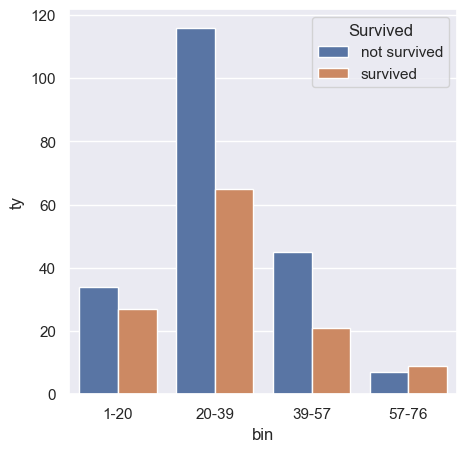

In [22]:
yu=u.groupby('bin')['Survived'].value_counts()
yu=yu.reset_index(name='ty')
print(yu)
sns.barplot(data=yu,x='bin',y='ty',hue='Survived')
plt.show()

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [66]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df.loc[:,['Age','Sex','Pclass']]
y=df['Survived']

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
l=LabelEncoder()
x['Pclass']=l.fit_transform(x['Pclass'])
x['Sex']=l.fit_transform(x['Sex'])
y=l.fit_transform(y)


In [68]:
model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('r2 score is ',r2_score(y_test,y_pred))
print('mean square error is ',mean_squared_error(y_test,y_pred))

r2 score is  1.0
mean square error is  3.710111444867571e-32
